# 1. Pytorch computer vision

## 1.1 Importing computer vision libraries

*`torchvision.datasets` : get the datasets and loading function.

*`torchvision.models` : to get pretrained models

*`torchvision.tranforms`: manuplates the data ( images )

*`torch.utils.data.Dataset` : Base dataset class for pytorch

*`torch.utils.data.DataLoader` : Creates a Pyhtohn iterable over the dataset

In [1]:
# importing libraries

## import torch
import torch
from torch import nn

## import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

## visualization 
import matplotlib.pyplot as plt





## 1.2 Getting a dataset
`Fashion minist`   

In [2]:
from torchvision import datasets

train_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download=True,
    transform = ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [5]:
image, labels = test_data[1]
print(image.shape) 
print(labels)
print(image)

torch.Size([1, 28, 28])
2
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0510, 0.2627, 0.0000, 0.0000, 0.0000, 0.0000,
          0.1961, 0.1490, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0314,
          0.4706, 0.8196, 0.8863, 0.9686, 0.9294, 1.0000, 1.0000, 1.0000,
          0.9686, 0.9333, 0.9216, 0.6745, 0.2824, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5373, 0.9373,
          0.9882, 0.9529, 0.9176, 0.8980, 0.9333, 0.9569, 0.9647, 0.9412,
          0.9020, 0.9098, 0.9373, 0.9725, 0.9843, 0.7608, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.4000, 1.0000, 0.9059,
          0.8941, 0.8902, 0.8941, 0.9137, 0.9020, 0.9020, 0.8980, 0.8941,
          0.9098, 0.9098, 0.905

In [6]:
class_name = train_data.classes
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_name[labels]

'Pullover'

In [8]:
class_to_ind = train_data.class_to_idx
class_to_ind

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [9]:
targets = train_data.targets
targets

tensor([9, 0, 0,  ..., 3, 0, 5])

## 1.3 Visualizing our Data

Text(0.5, 1.0, 'Shirt')

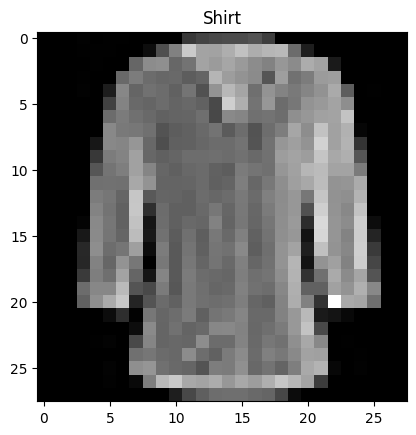

In [10]:
image, labels = test_data[4]
plt.imshow(image.squeeze(), cmap = "gray")
plt.title(class_name[labels])

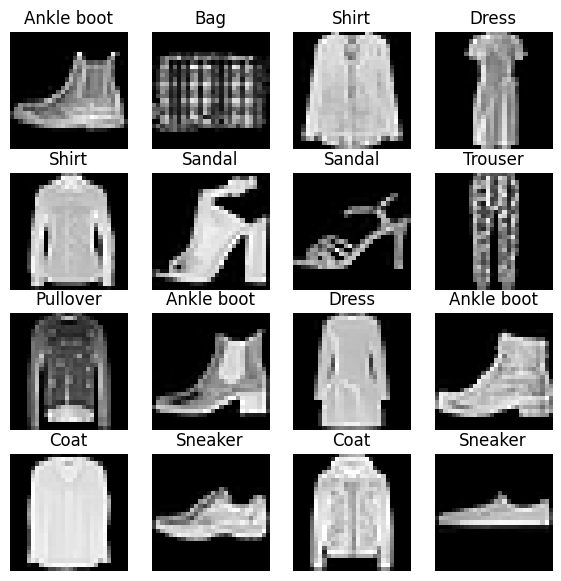

In [11]:
torch.manual_seed(42)
row, col = 4, 4
fig = plt.figure(figsize=(7,7))

for i in range(1,row*col+1):
    random_idx = torch.randint(0, len(test_data), size = [1]).item()
    image, label = test_data[random_idx]
    fig.add_subplot(row, col,i)
    plt.imshow(image.squeeze(), cmap = "gray")
    plt.title(class_name[label])
    plt.axis(False);

    


In [12]:
train_data , test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

# 2. Prepare dataLoader


In [13]:
## data loader with mini batches
from torch.utils.data import DataLoader
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset = train_data, 
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset = test_data, 
                              batch_size=BATCH_SIZE,
                              shuffle=True)


print(f"Train Dataloader : {train_dataloader} \nTest DataLoader : {test_dataloader}")
print(f"Train dataLoader : {len(train_dataloader)} for {BATCH_SIZE}")
print(f"Test dataLoader : {len(test_dataloader)} for {BATCH_SIZE}")

Train Dataloader : <torch.utils.data.dataloader.DataLoader object at 0x702e6af29c90> 
Test DataLoader : <torch.utils.data.dataloader.DataLoader object at 0x702e7cb0eaa0>
Train dataLoader : 1875 for 32
Test dataLoader : 313 for 32


In [14]:
train_feature_batch, train_labels_batch = next(iter(train_dataloader))
train_feature_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


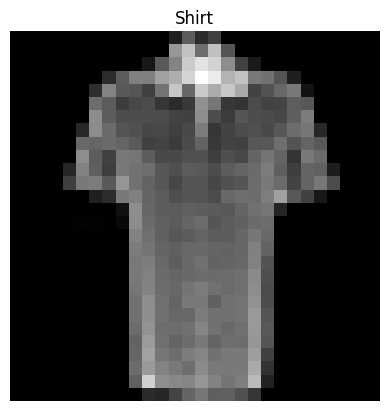

In [15]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_feature_batch), size=[1]).item()
img, label = train_feature_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_name[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

# 3. Baseline model

For better experiment to is good practice to start with baseline model
start simply and add complexity when necessary

In [16]:
flatten_model = nn.Flatten()

x = train_feature_batch[0]   ## [ chanenels, height, weight]

output = flatten_model(x)   ## [ chanenels, height * weight]
 
print(f" {x.shape} \n{output.shape}")

 torch.Size([1, 28, 28]) 
torch.Size([1, 784])


In [17]:
import torch.nn as nn
class FashionMnisitModeV0(nn.Module):
    def __init__(self, input_shape : int,
                 hidden_units : int,
                 output_shape : int ): 
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    
    def forward(self,x):
        return self.layer_stack(x)

In [18]:
## initilizing the model 

model_V0 = FashionMnisitModeV0(
    input_shape = 28*28,
    hidden_units = 10,
    output_shape = len(class_name)
).to("cpu")

model_V0

FashionMnisitModeV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [19]:
torch.manual_seed(42)
dummy_input = torch.rand(size = [1, 1,28,28])

model_V0(dummy_input) , model_V0(dummy_input).shape


(tensor([[ 0.2984,  0.0482, -0.1671,  0.0964,  0.0050,  0.3900,  0.2800, -0.4258,
          -0.1690, -0.2083]], grad_fn=<AddmmBackward0>),
 torch.Size([1, 10]))

## 3.1 setup loss , optmizer and evaluatoin matrix

* loss function  - multiclass data so `nn.CrossEntropyLoss()`
* optmizer - `torch.optim.SGD()`
* Evaluation matric - accuracy

In [20]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_V0.parameters(),
                            lr = 0.1)


## 3.2 Creating a function to time our experiments

Machine learning is very experimental


1. loss and optimizer values, 
2. running time of model

In [21]:
from timeit import default_timer as Timer

def print_train_time(start:float,
                     end:float,
                     device : torch.device = None):
    
    """ Print difference between start and end time """
    total_time = end - start
    print(f"Total time {total_time:.2f} Second on Device : {device} ")
    # return total_time

In [22]:
start_time = Timer()

## Write some code

end_time = Timer()

print_train_time(start_time, end_time, device="cpu"
                 )


Total time 0.00 Second on Device : cpu 


## 3.3 Creating training loop

1. Loop through the epoch
2. Loop through  training batches, perform training steps, calculate the train loss per batch.
3. Loop through  testing batches, perform testing steps, calculate the test loss per batch.
4. Print out what's happening
5. Time it all 

In [23]:
from tqdm import tqdm

# set the seed and timer
torch.manual_seed(42)
train_time_start_on_cpu = Timer()

# setting epoch
epochs = 3

# Create training and testing loop

for epoch in tqdm(range(epochs)):
    print(f"Epoch : {epoch} \n -------")

    # training
    train_loss = 0
    train_accuracy = 0

    # Add a loop to loop through training batches

    for batch, (X, y) in enumerate(train_dataloader):
        model_V0.train()

        ## Forward
        y_pred = model_V0(X)

        ## loss
        loss = loss_fn(y_pred, y)
        
        train_loss += loss
        train_accuracy += accuracy_fn(y, y_pred.argmax(dim=1))

        ## optimizer
        optimizer.zero_grad()

        ## loss backward
        loss.backward()

        ## optimizer step
        optimizer.step()

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)} / {len(train_dataloader.dataset)} Samples")
    

    ## total training loss divided by total dataloader
    train_loss /= len(train_dataloader)
    train_accuracy /= len(train_dataloader)

    ## testing

    test_loss , test_accuracy = 0, 0

    model_V0.eval()
    with torch.inference_mode():
        for X,y in test_dataloader:
            test_pred = model_V0(X)

            test_loss = loss_fn(test_pred, y)

            test_accuracy += accuracy_fn(y, test_pred.argmax(dim=1))

        test_loss /= len(test_dataloader)
        test_accuracy /= len(test_dataloader)
    

    print(f"\nTrain loss : {train_loss:.5f} , Train Accuracy : {train_accuracy:.2f} | Test loss : {test_loss:.5f} , Test Accuracy : {test_accuracy:.2f}")

train_time_end_on_cpu = Timer()

print_train_time(start = train_time_start_on_cpu,
                 end = train_time_end_on_cpu,
                 device = str(next(model_V0.parameters()).device))



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0 
 -------


Looked at 0 / 60000 Samples
Looked at 12800 / 60000 Samples
Looked at 25600 / 60000 Samples
Looked at 38400 / 60000 Samples
Looked at 51200 / 60000 Samples


 33%|███▎      | 1/3 [00:08<00:17,  8.56s/it]


Train loss : 0.59484 , Train Accuracy : 78.99 | Test loss : 0.00230 , Test Accuracy : 81.83
Epoch : 1 
 -------
Looked at 0 / 60000 Samples
Looked at 12800 / 60000 Samples
Looked at 25600 / 60000 Samples
Looked at 38400 / 60000 Samples
Looked at 51200 / 60000 Samples


 67%|██████▋   | 2/3 [00:16<00:07,  7.99s/it]


Train loss : 0.47741 , Train Accuracy : 83.17 | Test loss : 0.00215 , Test Accuracy : 81.40
Epoch : 2 
 -------
Looked at 0 / 60000 Samples
Looked at 12800 / 60000 Samples
Looked at 25600 / 60000 Samples
Looked at 38400 / 60000 Samples
Looked at 51200 / 60000 Samples


100%|██████████| 3/3 [00:23<00:00,  7.91s/it]


Train loss : 0.45552 , Train Accuracy : 84.08 | Test loss : 0.00207 , Test Accuracy : 82.89
Total time 23.73 Second on Device : cpu 


In [24]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 3.4 Building a better model with non-linearity

### Writing model

In [25]:
## create a model with non-linear and linear layers

class FashionMnisitModeV1(nn.Module):
    def __init__(self, input_shape : int, hidden_units:int, output_shape : int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )
    
    def forward(self,x):
        return self.layer_stack(x)


torch.manual_seed(42)
model_v1 = FashionMnisitModeV1(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_name)
).to(device)

model_v1 , next(model_v1.parameters()).device

(FashionMnisitModeV1(
   (layer_stack): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=784, out_features=10, bias=True)
     (2): ReLU()
     (3): Linear(in_features=10, out_features=10, bias=True)
     (4): ReLU()
   )
 ),
 device(type='cuda', index=0))

### loss and optimizer

In [26]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_v1.parameters(),
                            lr = 0.1)

### train and test functions

In [27]:
## functionalization of train and test

import torch.utils
import torch.utils.data
import torch.utils.data.dataloader


def train_step(model : torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               optimizer,
               accuracy_fn,
               device):
    
    ## training the model
    # model.to(device)
    model.train()
    train_loss, train_acc = 0, 0
    ## batch
    for batch, (X,y) in enumerate(dataloader):
        
        X, y = X.to(device), y.to(device)
        print(X.shape, y.shape)
        # forward
        y_pred = model(X).unsqueeze()
        print(y_pred.shape)
        ## calculate loass and accuracy
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y, y_pred.argmax(dim=1))

        ## optmizer zero grad
        optimizer.zero_grad()

        ## loss backward
        loss.backward()

        ## optmizer step
        optimizer.step()

        if batch % 300 == 0:
            print(f"Looked {batch * len(x)} / {len(dataloader)} data ")
    
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)

    print(f"Train Loss : {train_loss:.5f} | Train Accuracy : {train_acc:.2f}")


def test_step(model,dataloader,loss_fn,accuracy_fn ,device):
    
    test_loss, test_acc = 0, 0

    # model.to(device)

    model.eval()

    with torch.inference_mode():
        for X,y in dataloader:
            X,y = X.to(device), y.to(device)
            
            test_pred = model(X)
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y, test_pred.argmax(dim=1))
        
        test_loss /= len(dataloader)
        test_acc /= len(dataloader)
    
    print(f"Test Loss : {test_loss:.5f} | Test Accuracy : {test_acc:.2f}")




In [28]:
from helper_functions import accuracy_fn
EPOCHS = 3
optimizer = torch.optim.SGD(params=model_v1.parameters(), 
                            lr = 0.1)


torch.manual_seed(42)
train_time_start_on_gpu = Timer()
for epoch in tqdm(range(EPOCHS)):
    print(f"Epoch : {epoch} \n-----------")
    train_step(
        model = model_v1,
        dataloader = train_dataloader,
        loss_fn=loss_fn,
        optimizer = optimizer,
        accuracy_fn=accuracy_fn,
        device=device)
    
    test_step(
        model = model_v1,
        dataloader=test_dataloader,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device = device
    )



train_time_end_on_gpu = Timer()
print_train_time(train_time_start_on_gpu,train_time_end_on_gpu,device)

  0%|          | 0/3 [00:00<?, ?it/s]


Epoch : 0 
-----------
torch.Size([32, 1, 28, 28]) torch.Size([32])


TypeError: unsqueeze() missing 1 required positional arguments: "dim"

In [29]:
# def eval_model(model : torch.nn.Module,
#                dataloader : torch.utils.data.DataLoader,
#                loss_fn : torch.nn.Module,
#                accuracy_f,
#                device = "cpu"):
    
#     loss , acc = 0, 0

#     model.eval()
#     with torch.inference_mode():
#         for X, y in dataloader:
#             X, y = X.to(device), y.to(device)
#             y_pred = model(X)
#             loss += loss_fn(y_pred, y)
#             acc = accuracy_f(y, y_pred.argmax(dim=1))


#         loss /= len(dataloader)
#         acc /= len(dataloader)
    
    


def eval_model(model,dataloader,loss_fn,accuracy_fn ,device = "cpu"):
    """ returning the dictionary which contain evaulation of model 
    
   Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    
    """
    # print("Device : ",device)
    test_loss, test_acc = 0, 0

    # model.to(device)

    model.eval()

    with torch.inference_mode():
        for X,y in dataloader:
            X,y = X.to(device), y.to(device)
            
            test_pred = model(X)
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y, test_pred.argmax(dim=1))
        
        test_loss /= len(dataloader)
        test_acc /= len(dataloader)
    
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": test_loss.item(),
            "model_acc": test_acc}

In [30]:
from helper_functions import accuracy_fn
EPOCHS = 3
optimizer = torch.optim.SGD(params=model_V0.parameters(), 
                            lr = 0.1)

torch.manual_seed(42)
train_time_start_on_gpu = Timer()
for epoch in tqdm(range(EPOCHS)):
    print(f"Epoch : {epoch} \n-----------")
    train_step(
        model = model_V0,
        dataloader = train_dataloader,
        loss_fn=loss_fn,
        optimizer = optimizer,
        accuracy_fn=accuracy_fn,
        device= "cpu")
    
    test_step(
        model = model_V0,
        dataloader=test_dataloader,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device = "cpu"
    )


train_time_end_on_gpu = Timer()
print_train_time(train_time_start_on_gpu,train_time_end_on_gpu,"cpu")

eval_model(model_V0,test_dataloader,loss_fn,accuracy_fn)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0 
-----------
torch.Size([32, 1, 28, 28]) torch.Size([32])


TypeError: unsqueeze() missing 1 required positional arguments: "dim"

In [31]:
from helper_functions import accuracy_fn

EPOCHS = 3
optimizer = torch.optim.SGD(params=model_v1.parameters(), 
                            lr = 0.1)


torch.manual_seed(42)
train_time_start_on_gpu = Timer()
for epoch in tqdm(range(EPOCHS)):
    print(f"Epoch : {epoch} \n-----------")
    train_step(
        model = model_v1,
        dataloader = train_dataloader,
        loss_fn=loss_fn,
        optimizer = optimizer,
        accuracy_fn=accuracy_fn,
        device=device)
    
    test_step(
        model = model_v1,
        dataloader=test_dataloader,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device = device
    )



train_time_end_on_gpu = Timer()
print_train_time(train_time_start_on_gpu,train_time_end_on_gpu,device)
eval_model(model_v1,test_dataloader,loss_fn,accuracy_fn,device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0 
-----------
torch.Size([32, 1, 28, 28]) torch.Size([32])


TypeError: unsqueeze() missing 1 required positional arguments: "dim"

In [32]:
model_V0_evaluation = eval_model(model_V0,test_dataloader,loss_fn,accuracy_fn)
model_V1_evaluation =eval_model(model_v1,test_dataloader,loss_fn,accuracy_fn,device=device)
print(model_V0_evaluation)
print(model_V1_evaluation)

{'model_name': 'FashionMnisitModeV0', 'model_loss': 0.5168817043304443, 'model_acc': 82.90734824281151}
{'model_name': 'FashionMnisitModeV1', 'model_loss': 2.3021047115325928, 'model_acc': 10.77276357827476}


# MODEL 2 : CNN

## step down in to `conv2d`

In [33]:
torch.manual_seed(42)

images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(images.shape)
print(test_image.shape)
print(test_image)

torch.Size([32, 3, 64, 64])
torch.Size([3, 64, 64])
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978,  1.0261,  1.1465,  ...,  1.2134,  0.9354, -0.

In [34]:
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride= 1,
                       padding = 0
                       )

conv_image = conv_layer(test_image)
conv_image.shape

torch.Size([10, 62, 62])

In [35]:
torch.manual_seed(42)
maxPool_layer = nn.MaxPool2d(kernel_size=2,
                             stride=2,
                             padding=0)

maxpool_image = maxPool_layer(conv_image)
maxpool_image.shape

torch.Size([10, 31, 31])

In [36]:
random_tensor = torch.randn((1,1,2,2))
rand_maxpool = maxPool_layer(random_tensor)
print(random_tensor)
print(random_tensor.shape)
print(rand_maxpool)
print(rand_maxpool.shape)

tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
torch.Size([1, 1, 2, 2])
tensor([[[[0.3367]]]])
torch.Size([1, 1, 1, 1])


## Building CNN network

In [37]:
class FashionMnisitModeV2(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()

        self.block1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1
                      ),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)          
        )

        self.block2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1
                      ),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)          
        )
        
        self.classifier = nn.Sequential(
            nn.Flatten(), 
            nn.Linear(hidden_units*7*7,output_shape)
        )

    def forward(self, x):
            # print(f"input shape : {x.shape}")
            x = self.block1(x)
            # print("shape of x after first Conv : ",x.shape)
            x = self.block2(x)
            # print("shape of x after second Conv : ",x.shape)
            x = self.classifier(x)
            # print("shape of classifier : ",x.shape)

            return x


model_v2 = FashionMnisitModeV2(input_shape=1,
                               hidden_units=30,
                               output_shape=len(class_name)).to(device)
# model_v2

In [38]:
rand_tensor_image = torch.randn((32, 1, 28, 28)).to(device)
model_v2(rand_tensor_image).shape

torch.Size([32, 10])

### setup a loss and optimizer

In [39]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_v2.parameters(),
                            lr = 0.1)

In [40]:
## functionalization of train and test

import torch.utils
import torch.utils.data
import torch.utils.data.dataloader


def train_step(model : torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               optimizer,
               accuracy_fn,
               device):
    
    ## training the model
    # model.to(device)
    model.train()
    train_loss, train_acc = 0, 0
    ## batch
    for batch, (X,y) in enumerate(dataloader):
        
        X, y = X.to(device), y.to(device)
        # print("Shape in Training model X and y",X.shape, y.shape)   ## 32, 1, 28,28  , 32
        # forward
        y_pred = model(X)   ## 32, 10
        
        # print("Shape in Training model",y_pred.shape)
        ## calculate loass and accuracy
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y, y_pred.argmax(dim=1))

        ## optmizer zero grad
        optimizer.zero_grad()

        ## loss backward
        loss.backward()

        ## optmizer step
        optimizer.step()

        if batch % 300 == 0:
            print(f"Looked {batch * len(x)} / {len(dataloader)} data ")
    
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)

    print(f"Train Loss : {train_loss:.5f} | Train Accuracy : {train_acc:.2f}")


def test_step(model,dataloader,loss_fn,accuracy_fn ,device):
    
    test_loss, test_acc = 0, 0

    # model.to(device)

    model.eval()

    with torch.inference_mode():
        for X,y in dataloader:
            X,y = X.to(device), y.to(device)
            
            test_pred = model(X)
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y, test_pred.argmax(dim=1))
        
        test_loss /= len(dataloader)
        test_acc /= len(dataloader)
    
    print(f"Test Loss : {test_loss:.5f} | Test Accuracy : {test_acc:.2f}")




In [41]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
from helper_functions import accuracy_fn
from timeit import default_timer as Timer
epochs = 3

start_time = Timer()
for epoch in tqdm(range(epochs)):
    print(f"Epoch : {epoch} \n------------")

    train_step(model = model_v2,
               dataloader=train_dataloader,
               loss_fn= loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    
    test_step(model = model_v2,
              dataloader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

end_time = Timer()

print_train_time(start_time, end_time, device)



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0 
------------
Looked 0 / 1875 data 
Looked 300 / 1875 data 
Looked 600 / 1875 data 
Looked 900 / 1875 data 
Looked 1200 / 1875 data 
Looked 1500 / 1875 data 
Looked 1800 / 1875 data 
Train Loss : 0.53079 | Train Accuracy : 80.67


 33%|███▎      | 1/3 [00:12<00:25, 12.94s/it]

Test Loss : 0.35544 | Test Accuracy : 87.24
Epoch : 1 
------------
Looked 0 / 1875 data 
Looked 300 / 1875 data 
Looked 600 / 1875 data 
Looked 900 / 1875 data 
Looked 1200 / 1875 data 
Looked 1500 / 1875 data 
Looked 1800 / 1875 data 
Train Loss : 0.31350 | Train Accuracy : 88.72


 67%|██████▋   | 2/3 [00:25<00:12, 12.89s/it]

Test Loss : 0.35058 | Test Accuracy : 87.40
Epoch : 2 
------------
Looked 0 / 1875 data 
Looked 300 / 1875 data 
Looked 600 / 1875 data 
Looked 900 / 1875 data 
Looked 1200 / 1875 data 
Looked 1500 / 1875 data 
Looked 1800 / 1875 data 
Train Loss : 0.27382 | Train Accuracy : 90.12


100%|██████████| 3/3 [00:38<00:00, 12.77s/it]

Test Loss : 0.28870 | Test Accuracy : 89.60
Total time 38.30 Second on Device : cuda 


In [42]:
model_v3_evaluation = eval_model(model = model_v2,
                              dataloader= test_dataloader,
                              loss_fn=loss_fn,
                              accuracy_fn= accuracy_fn,
                              device=device
                              )
model_v3_evaluation

{'model_name': 'FashionMnisitModeV2',
 'model_loss': 0.28814399242401123,
 'model_acc': 89.61661341853035}

In [43]:
import pandas as pd

compare_result = pd.DataFrame([model_V0_evaluation,model_V1_evaluation,model_v3_evaluation])
compare_result

,model_name,model_loss,model_acc
0,FashionMnisitModeV0,0.516882,82.907348
1,FashionMnisitModeV1,2.302105,10.772764
2,FashionMnisitModeV2,0.288144,89.616613


In [44]:
def make_predicition(model:nn.Module,data:list,device:torch.device = device):
    pred_probs = []
    model.eval()

    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample , dim=0).to(device)

            pred_logits = model(sample)

            pred_prob = torch.softmax(pred_logits.squeeze(), dim = 0)

            pred_probs.append(pred_prob.cpu())
    

    return torch.stack(pred_probs)



In [45]:
import random
random.seed(42)
test_sample =[]
test_labels = []

for sample, labels in random.sample(list(test_data), k= 9):
    test_sample.append(sample)
    test_labels.append(labels)

test_sample[0].shape, test_labels[0], class_name[test_labels[0]]

(torch.Size([1, 28, 28]), 5, 'Sandal')

In [46]:
pred_prob = make_predicition(model_v2, test_sample)

pred_classes = pred_prob.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 2, 3, 0, 4, 7, 1])

In [47]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

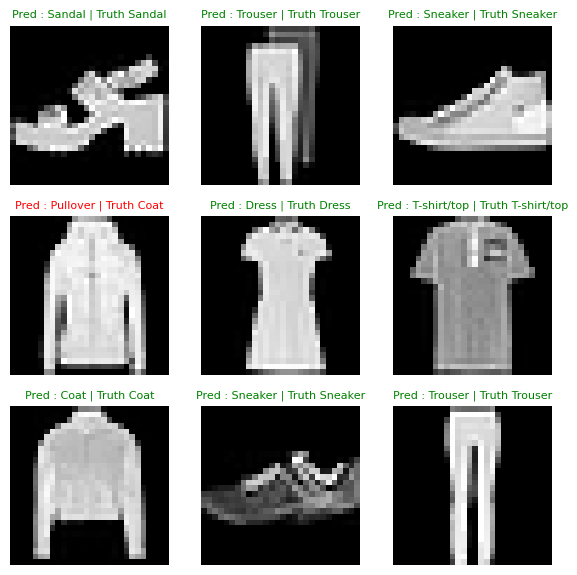

In [48]:
plt.figure(figsize = (7,7))
nrows = 3
ncols = 3

for i , sample in enumerate(test_sample):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(sample.squeeze(), cmap = "gray")

    pred_label = class_name[pred_classes[i]]

    truth_label = class_name[test_labels[i]]

    title_text = f"Pred : {pred_label} | Truth {truth_label}"

    if pred_label == truth_label:
        plt.title(title_text, fontsize = 8, c="g")
    else:
        plt.title(title_text, fontsize = 8, c="r")

    plt.axis(False)

### Confusion matrix
* make prediciton with our trained model on the test dataset
* Make a confusion matrix `torchmetrics.ConfusionMatrix`
* Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [49]:
import mlxtend

In [89]:
# Import tqdm for progress bar

from tqdm.auto import tqdm
# torch.manual_seed(42)
# 1. Make predictions with trained model
y_preds = []
model_v2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_v2(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim = 1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([0, 2, 5, 5, 1, 2, 7, 6, 3, 5])

In [75]:
len(y_pred_tensor)

10000

In [52]:
len(class_name)

10

In [83]:
y_pred_tensor[:10]

tensor([4, 8, 0, 4, 2, 6, 7, 7, 8, 7])

In [84]:
test_data.targets[:10]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

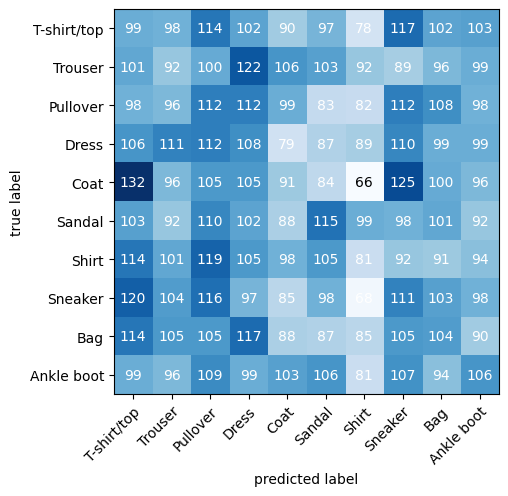

In [85]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_name), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor.cpu(),
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_name, # turn the row and column labels into class names
    figsize=(7, 5)
);

tensor([[ 71, 104, 110,  96,  99,  83,  94, 128, 121,  94],
        [ 96,  74, 125, 103, 121,  88,  96, 108,  89, 100],
        [ 88,  91,  90, 108, 112,  89, 102, 123, 119,  78],
        [ 96,  86,  92, 102, 105,  96, 118, 119,  97,  89],
        [ 73,  88, 123, 123, 112,  93, 111,  86, 107,  84],
        [ 78, 108, 102, 107, 113,  97, 117, 105,  85,  88],
        [ 74,  95, 120, 103, 127,  88, 105, 102, 108,  78],
        [ 74,  89, 114, 112, 117,  93, 107, 104, 103,  87],
        [ 86,  96, 113,  97, 105,  83,  90, 110, 104, 116],
        [ 75, 101, 103, 120, 111,  77, 112, 108, 108,  85]])

# FOOD Mini 

## 1. Get data
Food101 dataset 
our data start with three classes of food with 10% of imagees

In [29]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

## if image folder exist or not

if image_path.is_dir():
    print(f"{image_path} directary is already exist .... skipping")

else:
    print(f"{image_path} doesn't exit ..... Creating")
    image_path.mkdir(parents=True, exist_ok=True)

    ## Dowanload pizza strak sushi data
    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)
    
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping the data")
        zip_ref.extractall(image_path)
    

print("DONE \n______________________")


data/pizza_steak_sushi directary is already exist .... skipping
DONE 
______________________


In [30]:
import os
for dirpath, dirnames, filenames in os.walk(image_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.


In [31]:
train_dir = image_path / "train"
test_dir = image_path / "test"
train_dir, test_dir 

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Random image path: data/pizza_steak_sushi/train/pizza/2228322.jpg
Image class: pizza
Image height: 512
Image width: 512


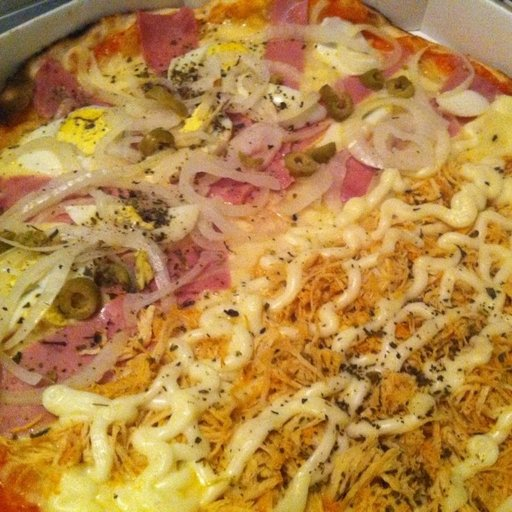

In [32]:
import random
from PIL import Image

random.seed(42)
image_path_list = list(image_path.glob("*/*/*.jpg"))

## 2. pick random imgage

random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img


## 2.2 Tranforming data

Before we can use our image with pytorch:
1. target data into tensor
2. turn it into a `torch.utils.data.Dataset` and subsequently a `torch.utils.data.Dataloader` , we'll call these `Dataset` and `Dataloader`

In [33]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### Transforming data with `torchvision.tranforms`

In [34]:
## Write a tranform for image

data_tranform = transforms.Compose([
    ## reseize your image to 64 64
    transforms.Resize(size=(64, 64)),
    # flip the image randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # turn the image into a torch.tensor
    transforms.ToTensor()
])

In [35]:
data_tranform(img).shape

torch.Size([3, 64, 64])

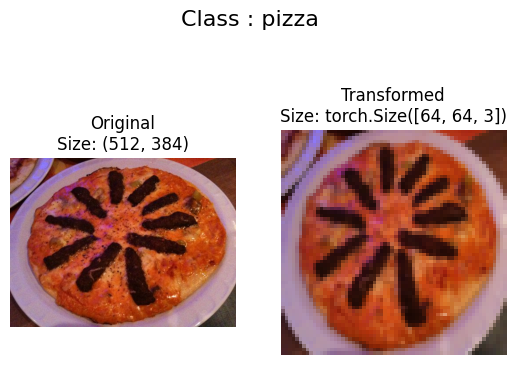

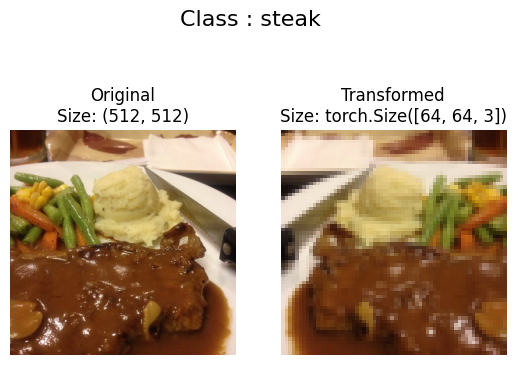

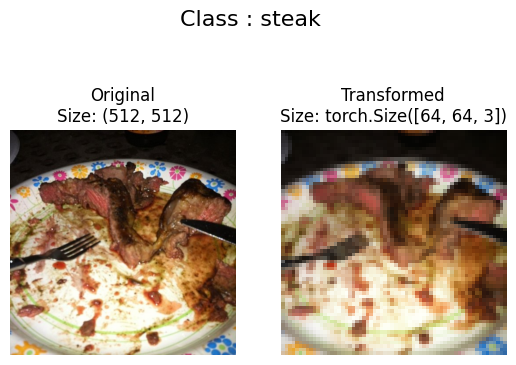

In [36]:
import matplotlib.pyplot as plt
def plot_tranformed_images(image_paths : list , transform, n=3, seed = None):
    if seed:
        random.seed(seed)

    random_image_path = random.sample(image_paths, k=n) 
    for image_path in random_image_path:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows = 1, ncols = 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis(False)

            ## tranformed and plot
            transform_image = transform(f).permute(1,2,0)
            ax[1].imshow(transform_image)
            ax[1].set_title(f"Transformed\nSize: {transform_image.shape}")
            ax[1].axis(False)

            fig.suptitle(f"Class : {image_path.parent.stem}",fontsize = 16)
        
plot_tranformed_images(image_paths=image_path_list,
                       transform=data_tranform)

In [37]:
from torchvision import datasets

train_data = datasets.ImageFolder(root = train_dir, 
                                  transform=data_tranform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root = test_dir,
                                 transform=data_tranform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [38]:
class_name = train_data.classes
class_name

['pizza', 'steak', 'sushi']

In [39]:
len(train_data)

225

In [40]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.09

In [41]:
img, label = train_data[0][0] , train_data[0][1]
img

tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.0902, 0.0902, 0.

In [42]:
label , class_name[label]

(0, 'pizza')

In [43]:
img.shape, label

(torch.Size([3, 64, 64]), 0)

Text(0.5, 1.0, 'pizza')

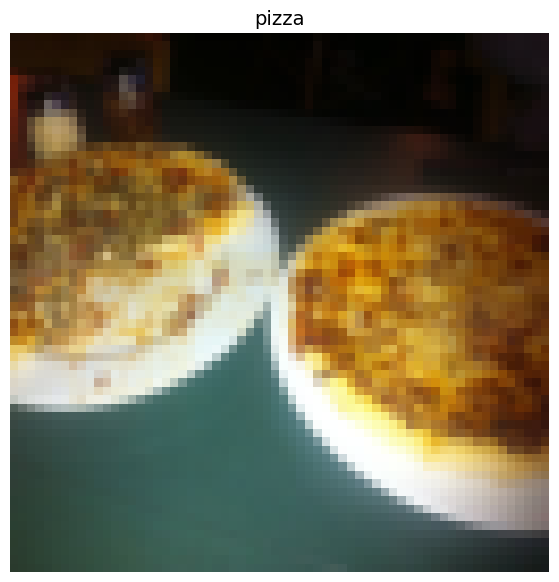

In [ ]:
### rearrange other dimentions
img_permute = img.permute(1,2,0)

plt.figure(figsize = (10,7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_name[label], fontsize=14)

In [45]:
import os
os.cpu_count()

64

### Turn loaded images into dataloader
 becuase we are using `batch_size`

In [46]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=4,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              num_workers=4,
                              shuffle=False)

In [47]:
len(train_dataloader), len(test_dataloader)

(8, 3)

In [48]:
img,label = next(iter(train_dataloader))
img.shape, label.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

### Option 2 : Loading image DAta with a custon `Dataset`
1. Load images from file
2. Get class names from the Dataset
3. Get classes as a dictionary from the Dataset

In [49]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List


In [50]:
# Instances of torchvision Dataset.ImageFolder
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### Creating a helper function to get class names

we want a function : 
1. get class name using `os.scandir()` to traverse a target directory (ideally the directory is in standard image classificatoin format).
2. Raise an error if the class names aren't found
3. Turn the class names into a dict and list and return them

In [52]:
## setup path fro target dirctory

target_directory = train_dir
print(f"Target dir : {target_directory}")

## get the class name from target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir : data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [55]:
def find_classes(directory : str) -> Tuple[List[str], Dict[str,int]]:
    """
        Find the class folder names in target directory.
    """

    # Step1 : classes name by scnaning the target diectory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    
    ## 2. Raise an error if class name not found

    if not classes:
        raise FileNotFoundError(f"Couldn't find any clases in {directory} ... Please check file structure. ")
    
    ## 3. Create a dictionary of index labels ( computer prefer numbers rather nam str)

    class_to_idx = {class_name : i for i, class_name in enumerate(classes)}
    return classes, class_to_idx

In [56]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### Create a custom `Dataset` replicate `ImageFolder`

To create own dataset :
1. subclass `torch.utils.data.Dataset`
2. Init our subclass with target directory and tranform
3. Create Several attributes : 
    * paths
    * transform
    * classes
    * class_to_idx
4. `load_images()` function
5. `__getitem__()` function
6. `__len__()` method

In [ ]:
# Write a custom dateset class

from torch.utils.data import Dataset

# 1. subclass torch.utils.data.Dataset
class ImageFolderData(Dataset):

    # 2. initialize our custom dataset
    def __init__(self,
                 target_dir:str,
                 transform = None):
        ## 3. Create class attribute
        # get all the image paths
        self.paths = list(pathlib.Path(target_dir).glob("*/*.jpg"))
        